## August 2023

### 77. Combinations

In [ ]:
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:
        c = itertools.combinations(range(1, n+1), k)
        return [list(cm) for cm in c]

- I don't feel like taking credit for this because I didn't really do anything; `itertools.combinations()` did the work for me.

### 46. Permutations

In [ ]:
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        p = itertools.permutations(nums, len(nums))
        return [list(pm) for pm in p]

- There's not much to explain here; I used `itertools.permutations()` to get all of the permutations and then returned them.

### 17. Letter Combinations of a Phone Number

In [ ]:
class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        phonedict = dict()
        phonedict[2], phonedict[3], phonedict[4], phonedict[5], phonedict[6] = 'abc', 'def', 'ghi', 'jkl', 'mno'
        phonedict[7], phonedict[8], phonedict[9] = 'pqrs', 'tuv', 'wxyz'

        res = []
        def rec(digits, word, c, i):
            if i > len(digits):
                return
            word += c
            if len(word) == len(digits):
                res.append(word)
                return
            for c in phonedict[int(digits[i])]:
                rec(digits, word, c, i+1)
        rec(digits, '', '', 0)

        return [r for r in res if r != ""]

- First, I saved the strings corresponding to a digit on the phone in the dictionary `phonedict`.
- Then I used the recursive function `rec`, to accumulate every combination of letters for the given `digits`.  

### 139. Word Break

In [ ]:
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        
        wordDict = set(wordDict)
        res, seen = set(), set()
        def bt(constructed, remainder, wordDict):
            # memoization happens here. we keep track of the words we have already tried so we don't end up trying them again
            if not constructed in seen:
                seen.add(constructed)
            elif constructed in seen:
                return

            # we have succesfully constructed the string from wordDict
            if not remainder:
                res.add(constructed)
                return

            # recursive call with every word that matches the beginning of the remaining string
            # if no string matches, we have reached a cutoff condition and return
            ret = True
            for word in wordDict:
                if remainder.startswith(word):
                    ret = False
                    bt(constructed + word, remainder[len(word):], wordDict)
            if ret:
                return

        bt("", s, wordDict)
        return len(list(res)) > 0

- We perform a DFS to construct `s` with the given `wordList`.
- On every recursive call, we iterate over `wordList`, and start another recursive call for every `word` that matches the beginning of the `remainder` of `s`.
- Eventually we will either have no `remainder`, which means that we have successfully constructed `s`, or we don't have any words left that match the beginning of the `remainder`, at which point we cut off.

### 95. Unique Binary Search Trees II

In [ ]:
class Solution:
    def getTrees(self, start, end):
        if start > end:  # the current node does not have any subtrees
            return [None]
        
        # for every node i in the range of n, we calculate the node's left and right subtrees
        res = []
        for root in range(start, end+1):
            leftTrees = self.getTrees(start, root-1)  # i.e. for root: 3  leftTrees:  Trees(1,2) -> ...
            rightTrees = self.getTrees(root+1, end)   #                   rightTrees: Trees(4,3) -> [None]

            # actually build the trees and add them to res
            for l in leftTrees:
                for r in rightTrees:
                    res.append(TreeNode(root, l, r))

        return res

    def generateTrees(self, n: int) -> List[Optional[TreeNode]]:
        return self.getTrees(1, n)

- Unfortunately, I wasn't able to come up with a solution to this on my own, so I looked into the editorial section.
- How it works is that we recursively calculate every possible left and right subtree for every `root` in the range `n`.
- The left subtrees, `leftTrees`, will be all possible trees in the range `1` to `root-1`, while the right subtrees, `rightTrees`, will be all possible trees in the range `root+1` to `n`.

### 920. Number of Music Playlists

In [ ]:
class Solution:
    def numMusicPlaylists(self, n: int, goal: int, k: int) -> int:
        MOD = 1_000_000_007
        dp = [ [0 for _ in range(n + 1)] for _ in range(2) ]
        dp[0][0] = 1

        # i: length of the playlist  j: unique songs in the playlist
        # dp[i][j]: number of playlists constructable with i and j
        for i in range(1, goal+1):
            dp[i%2][0] = 0
            for j in range(1, min(i,n)+1): # min(i,n) because there could be less songs available(n) than the length of the playlist(i)
                dp[i%2][j] = dp[(i-1)%2][j-1] * (n-j + 1)) % MOD # n - j  is the number of songs to choose from, having picked j songs already
                if j > k:
                    dp[i%2][j] = (dp[i%2][j] + dp[(i-1)%2][j] * (j-k)) % MOD

        return dp[goal%2][n]

- I did not come up with this solution myself, that much is for sure.
- This is also the first time that I don't really understand a solution even after looking at it, so I can't really give an explanation here.

### 74. Search a 2D Matrix

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, target: int) -> bool:
        if r >= l:
            middle = l + (r-l)//2

            if nums[middle] == target:
                return True
            elif nums[middle] < target:
                return self.bin(nums, middle+1, r, target)
            elif nums[middle] > target:
                return self.bin(nums, l, middle-1, target)
        else:
            return False

    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        nums = list(itertools.chain.from_iterable(matrix))
        return self.bin(nums, 0, len(nums)-1, target)

- I solved this problem with a simple binary search over a flattened version of the given `matrix`.

### 33. Search in Rotated Sorted Array

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, target: int) -> int:
        if l <= r:
            m = l + (r-l)//2
            print(f'l = {l}  r = {r}  m = {m}  nums[m] = {nums[m]}')
            if nums[m] == target:
                return m
            elif nums[r] == target:
                return r
            elif nums[m-1] == target:
                return m-1
            #case 1 / 2
            elif nums[m-1] >= target and nums[r] >= target or nums[m-1] <= target and nums[r] <= target:
                if nums[m-1] < nums[r]:
                    return self.bin(nums, l, m-1, target)
                else:
                    return self.bin(nums, m+1, r, target)
            #case 3
            elif nums[m-1] >= target and not nums[r] >= target:
                return self.bin(nums, l, m-1, target)
            #case 4
            elif nums[r] >= target and not nums[m-1] >= target:
                return self.bin(nums, m+1, r, target)
        else:
            return -1
    def search(self, nums: List[int], target: int) -> int:

        # case 1 topleft and topright >= target  -> go with lesser top
        # case 2 topleft and topright <= target  -> go with lesser top
        # case 3 topleft >= target and topright not >= target -> go left
        # case 4 topright >= target and topleft not >= target -> go right

        return self.bin(nums, 0, len(nums)-1, target)

- Luckily, I have solved this problem before, so I was able to copy and paste my solution.
- I have solved it with a binary search that considers four distinct cases for deciding whether to continue searching in the left or the right sublist. The cases have been added as comments in the solution.

### 2616. Minimize the Maximum Difference of Pairs

In [ ]:
class Solution:
    def minimizeMax(self, nums: List[int], p: int) -> int:
        # we need to sort nums for everything below to work
        nums.sort()

        # how many pairs with a difference less or equal to diff are there in nums
        def validPairs(diff: int):
            i, pairs = 0,0
            while i < len(nums)-1:
                if nums[i+1] - nums[i] <= diff:
                    pairs += 1
                    i += 1
                i += 1
            return pairs

        # we find the smallest possible upper boundary for the difference such that there are p pairs with that maximum difference
        def binSearch(l: int, r: int, target: int):
            if l <= r:
                m = l + (r-l)//2

                if validPairs(m) >= target:
                    return binSearch(l, m-1, target)
                elif validPairs(m) < target:
                    return binSearch(m+1, r, target)
            else:
                return l

        # search space between 0 and greatest possible difference: rightmost(largest) - leftmost(smallest)
        return binSearch(0, nums[-1]-nums[0], p)

- This problem was pretty difficult, so I had to look into the editorial to understand its solution.
- To understand how it works, we first need to know that we can easily find the number of `pairs` for a **concrete maximum difference** via the helper function `validPairs()` when `nums` has been sorted beforehand.
- What is left to do then is to perform a binary search over **all possible maximum differences** and find the **smallest maximum difference** that satisfies the condition that there are `p` pairs for this **maximum difference** in `nums`.

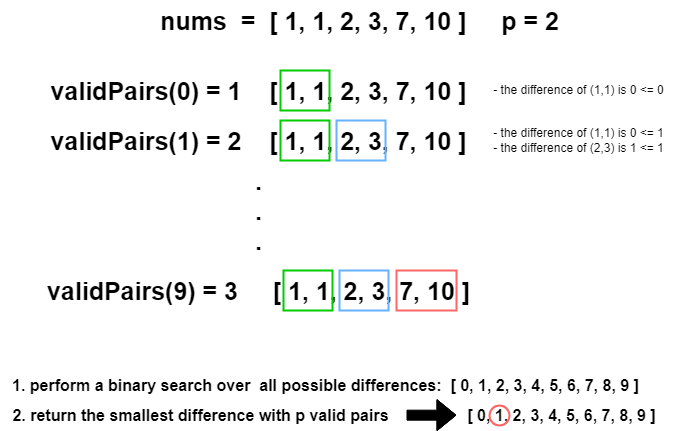

### 81. Search in Rotated Sorted Array II

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, target: int) -> int:
        if l <= r:
            m = l + (r-l)//2
            print(f'l = {l}  r = {r}  m = {m}  nums[m] = {nums[m]}')
            if nums[m] == target:
                return m
            elif nums[r] == target:
                return r
            elif nums[m-1] == target:
                return m-1
            #case 1 / 2
            elif nums[m-1] >= target and nums[r] >= target or nums[m-1] <= target and nums[r] <= target:
                if nums[m-1] < nums[r]:
                    return self.bin(nums, l, m-1, target)
                else:
                    return self.bin(nums, m+1, r, target)
            #case 3
            elif nums[m-1] >= target and not nums[r] >= target:
                return self.bin(nums, l, m-1, target)
            #case 4
            elif nums[r] >= target and not nums[m-1] >= target:
                return self.bin(nums, m+1, r, target)
        else:
            return -1
    def search(self, nums: List[int], target: int) -> int:
        # have to search unique values in nums
        nums = sorted(list(set(nums)))

        # case 1 topleft and topright >= target  -> go with lesser top
        # case 2 topleft and topright <= target  -> go with lesser top
        # case 3 topleft >= target and topright not >= target -> go left
        # case 4 topright >= target and topleft not >= target -> go right

        return self.bin(nums, 0, len(nums)-1, target) != -1

- The only two ways in which this problem differs from its predecessor are that it expects a boolean value whether the `target` exists in the given list `nums`, and that the values are not unique.
- Therefore, I slightly modified my solution to transform `nums` into a list containing only unique values, and instead of returning the actual index of the `target`, I return `True` if the value exists in `nums`, and `False`, otherwise.